In [1]:
import numpy as np 
import pandas as pd

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
X = df.iloc[:,:-1]
label = df.iloc[:,-1]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# Step 1. Center Data
X_scaled = StandardScaler().fit_transform(X)
X_scaled[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

In [7]:
# Step 2. Compute Covariance Matrix
cov_matrix = X_scaled.T @ X_scaled / (X_scaled.shape[0]-1)
cov_matrix

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [8]:
# Step 3. Eigenvalue decomposition
eigvals, eigvecs = np.linalg.eig(cov_matrix)
eigvals

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

In [9]:
# Ratio of explained variance per PC
explained_variances = []
for i in range(len(eigvals)):
    explained_variances.append(eigvals[i] / np.sum(eigvals))
 
print(np.sum(explained_variances), '\n', explained_variances)

1.0 
 [0.7277045209380132, 0.2303052326768066, 0.03683831957627393, 0.005151926808906313]


In [11]:
# Visualization (Embedding)
pc1 = np.dot(X_scaled, eigvecs[:,0])
pc2 = np.dot(X_scaled, eigvecs[:,1])
res = pd.DataFrame(pc1, columns=['PC1'])
res['PC2'] = pc2
res['label'] = label
res.head()

,PC1,PC2,label
0,-2.264542,-0.505704,setosa
1,-2.086426,0.655405,setosa
2,-2.367950,0.318477,setosa
3,-2.304197,0.575368,setosa
4,-2.388777,-0.674767,setosa


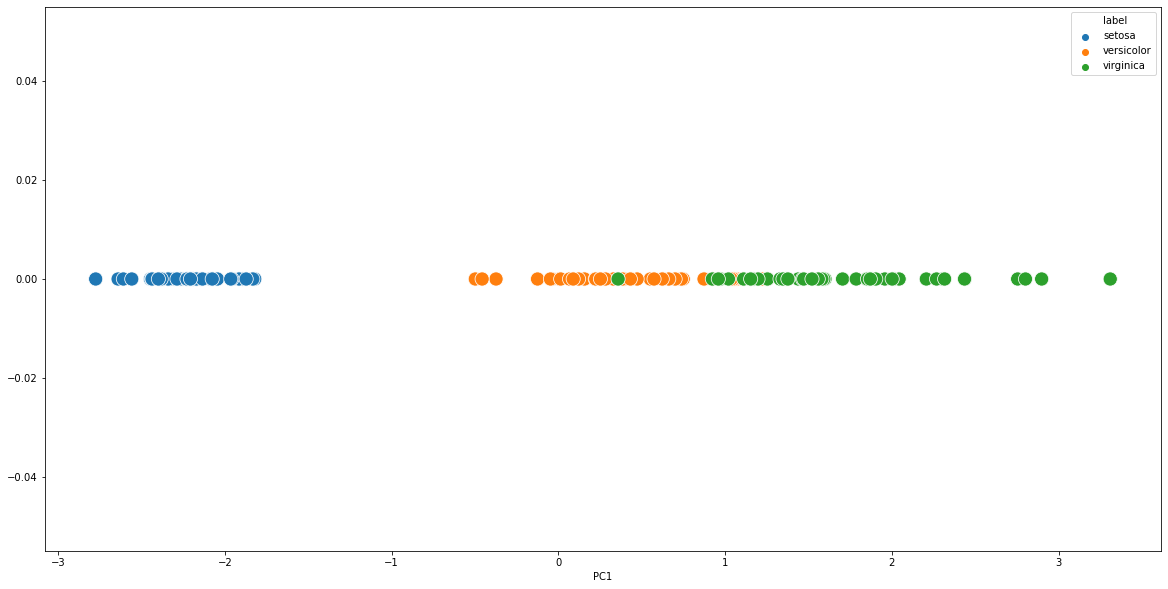

In [12]:
# Projection on 1-dim subspace
plt.figure(figsize=(20, 10))
sns.scatterplot(res['PC1'], [0] * len(res), hue=res['label'], s=200)

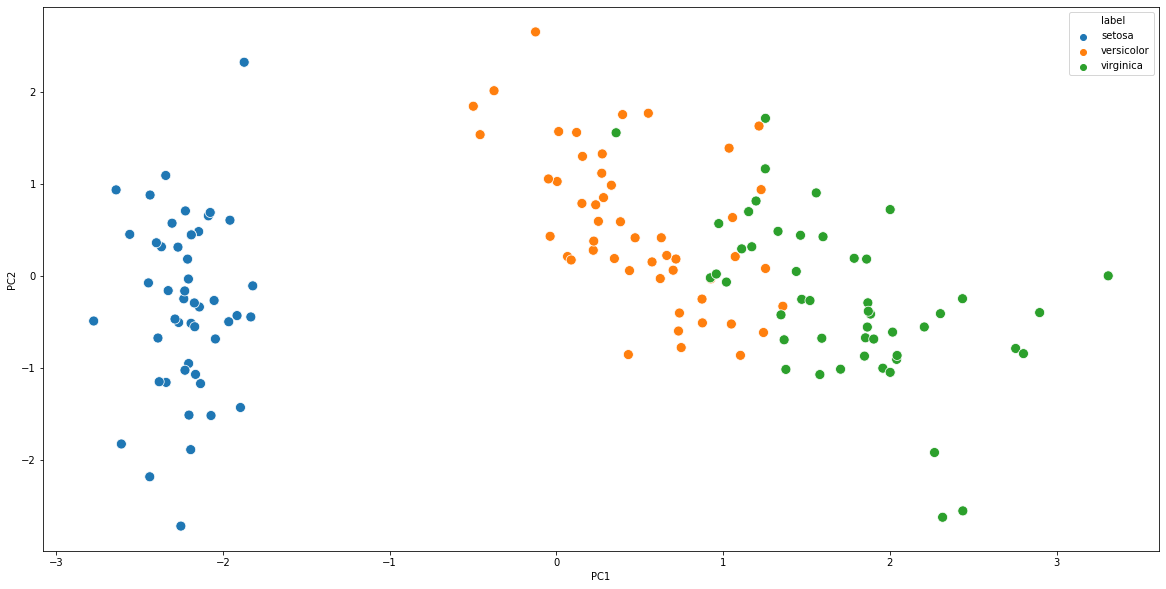

In [13]:
# Projection on 2-dim subspace
plt.figure(figsize=(20, 10))
sns.scatterplot(res['PC1'], res['PC2'], hue=res['label'], s=100)